# –ò–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫, –∑–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∏ –æ–±—â–∏–µ —Å–≤–µ–¥–µ–Ω–∏—è –æ –¥–∞–Ω–Ω—ã—Ö

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

In [16]:
calls = pd.read_excel("/content/drive/MyDrive/calls.xlsx")


In [17]:
calls.head()

subs_id  b_number          call_start  duration_sec direction
0   103648    134753 2023-07-06 09:42:00             4  outgoing
1   138421    108982 2023-07-02 05:08:00            25  outgoing
2   128120    136528 2023-07-14 08:25:00            74  outgoing
3   123503    120077 2023-07-12 21:19:00            12  outgoing
4   103214    102238 2023-07-11 20:03:00           119  outgoing

In [18]:
calls.shape

(525000, 5)

In [23]:
location = pd.read_excel("/content/drive/MyDrive/location.xlsx")


In [24]:
location.head()

subs_id           timestamp        lat        lon
0   104691 2023-07-12 13:44:00  51.172952  71.487984
1   143420 2023-07-15 14:47:00  51.152047  71.483807
2   129760 2023-07-01 08:11:00  51.123342  71.474190
3   115541 2023-07-07 05:57:00  51.163725  71.484300
4   147618 2023-07-02 03:07:00  51.143256  71.470337

In [25]:
location.shape

(721000, 4)

In [27]:
subs = pd.read_excel("/content/drive/MyDrive/subs.xlsx")

In [28]:
subs.head()

subs_id    region sim_activation_date  churn_flag
0   100000    Almaty          2023-04-13           0
1   100001  Shymkent          2023-12-15           0
2   100002    Almaty          2023-09-28           0
3   100003  Shymkent          2023-04-17           0
4   100004    Astana          2023-03-13           0

In [29]:
subs.shape

(50000, 4)

In [30]:
calls.isnull().sum()

subs_id         0
b_number        0
call_start      0
duration_sec    0
direction       0
dtype: int64

In [31]:
subs.isnull().sum()

subs_id                0
region                 0
sim_activation_date    0
churn_flag             0
dtype: int64

In [32]:
location.isnull().sum()

subs_id      0
timestamp    0
lat          0
lon          0
dtype: int64

In [33]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525000 entries, 0 to 524999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   subs_id       525000 non-null  int64         
 1   b_number      525000 non-null  int64         
 2   call_start    525000 non-null  datetime64[ns]
 3   duration_sec  525000 non-null  int64         
 4   direction     525000 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 20.0+ MB


In [34]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721000 entries, 0 to 720999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   subs_id    721000 non-null  int64         
 1   timestamp  721000 non-null  datetime64[ns]
 2   lat        721000 non-null  float64       
 3   lon        721000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 22.0 MB


In [35]:
subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   subs_id              50000 non-null  int64         
 1   region               50000 non-null  object        
 2   sim_activation_date  50000 non-null  datetime64[ns]
 3   churn_flag           50000 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.5+ MB


# EDA

–ê–±–æ–Ω–µ–Ω—Ç–æ–≤ –ø–æ —Ä–µ–≥–∏–æ–Ω–∞–º:
 region
Almaty       12556
Shymkent     12503
Astana       12472
Karaganda    12469
Name: count, dtype: int64

–û–±—â–∏–π —É—Ä–æ–≤–µ–Ω—å –æ—Ç—Ç–æ–∫–∞: 10.2%

–û—Ç—Ç–æ–∫ –ø–æ —Ä–µ–≥–∏–æ–Ω–∞–º:
 region
Karaganda    10.9%
Almaty       10.0%
Astana       10.0%
Shymkent     10.0%
Name: churn_flag, dtype: object


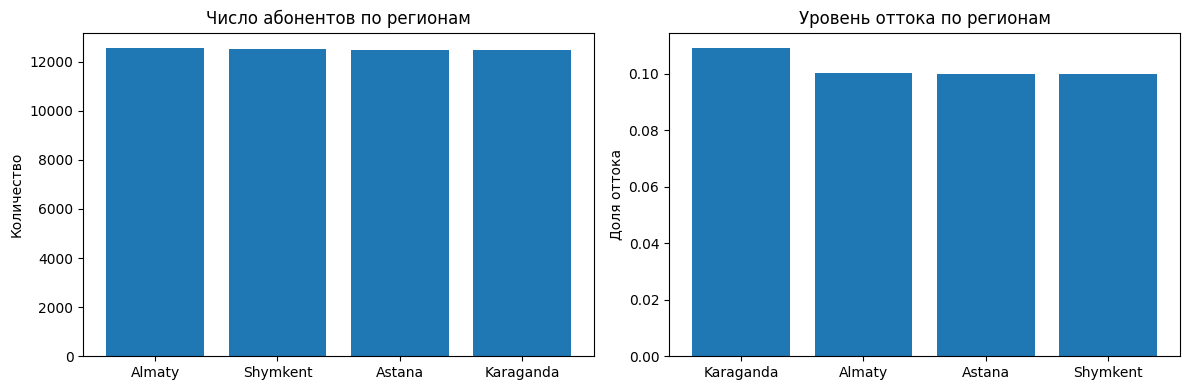

In [41]:
region_counts = subs['region'].value_counts()
print("–ê–±–æ–Ω–µ–Ω—Ç–æ–≤ –ø–æ —Ä–µ–≥–∏–æ–Ω–∞–º:\n", region_counts)

overall_churn_rate = subs['churn_flag'].mean()
print(f"\n–û–±—â–∏–π —É—Ä–æ–≤–µ–Ω—å –æ—Ç—Ç–æ–∫–∞: {overall_churn_rate:.1%}")

churn_by_region = subs.groupby('region')['churn_flag'].mean().sort_values(ascending=False)
print("\n–û—Ç—Ç–æ–∫ –ø–æ —Ä–µ–≥–∏–æ–Ω–∞–º:\n", churn_by_region.apply(lambda x: f"{x:.1%}"))

fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].bar(region_counts.index, region_counts.values)
axes[0].set_title('–ß–∏—Å–ª–æ –∞–±–æ–Ω–µ–Ω—Ç–æ–≤ –ø–æ —Ä–µ–≥–∏–æ–Ω–∞–º')
axes[0].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')

axes[1].bar(churn_by_region.index, churn_by_region.values)
axes[1].set_title('–£—Ä–æ–≤–µ–Ω—å –æ—Ç—Ç–æ–∫–∞ –ø–æ —Ä–µ–≥–∏–æ–Ω–∞–º')
axes[1].set_ylabel('–î–æ–ª—è –æ—Ç—Ç–æ–∫–∞')

plt.tight_layout()
plt.show()


–í—Å–µ –∞–±–æ–Ω–µ–Ω—Ç—ã –∏–∑ 4 –∫—Ä—É–ø–Ω–µ–π–Ω–∏—Ö –≥–æ—Ä–æ–¥–æ–≤ –ö–∞–∑–∞—Ö—Å—Ç–∞–Ω–∞, –∏ —Ç–∞–∫ –∂–µ —É—Ä–æ–≤–µ–Ω—å –æ—Ç—Ç–æ–∫–∞ –æ–¥–∏–Ω–∞–∫–æ–≤—ã—Ö. –î–∞–Ω–Ω—ã–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –ø–æ —Ä–µ–≥–∏–æ–Ω–∞–º —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ –ø–æ 12 —Ç—ã—Å—è—á –æ–∫–æ–ª–æ

count    50000.000000
mean        14.420000
std          3.919299
min          2.000000
25%         12.000000
50%         14.000000
75%         17.000000
max         33.000000
Name: loc_records, dtype: float64


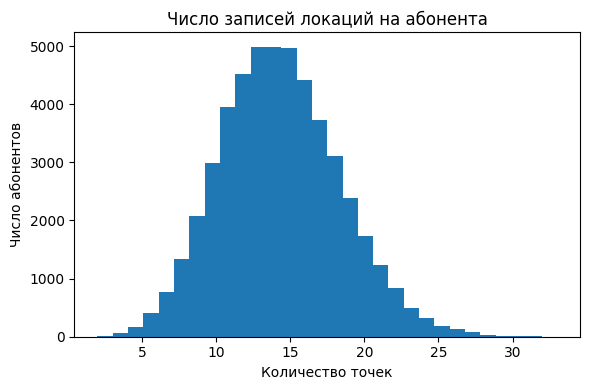

–¢–æ–ø-10 –ø–æ —á–∏—Å–ª—É —Ç–æ—á–µ–∫ –ª–æ–∫–∞—Ü–∏–∏:
 subs_id
124573    33
133332    33
130141    32
115039    31
125427    31
127108    31
132345    31
133997    31
148961    31
109709    30
Name: loc_records, dtype: int64
–ü—Ä–∏–º–µ—Ä –ø–µ—Ä–≤—ã—Ö 5 –¥–æ–º–∞—à–Ω–∏—Ö —Ç–æ—á–µ–∫:
    subs_id        lat        lon
0   100000  51.128193  71.488087
1   100001  51.130663  71.479258
2   100002  51.107495  71.512415
3   100003  51.139591  71.454428
4   100004  51.155753  71.476060


In [43]:
loc_counts = location.groupby('subs_id').size().rename('loc_records')
print(loc_counts.describe())

plt.figure(figsize=(6,4))
plt.hist(loc_counts, bins=30)
plt.title('–ß–∏—Å–ª–æ –∑–∞–ø–∏—Å–µ–π –ª–æ–∫–∞—Ü–∏–π –Ω–∞ –∞–±–æ–Ω–µ–Ω—Ç–∞')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–æ—á–µ–∫')
plt.ylabel('–ß–∏—Å–ª–æ –∞–±–æ–Ω–µ–Ω—Ç–æ–≤')
plt.tight_layout()
plt.show()

top_locators = loc_counts.nlargest(10)
print("–¢–æ–ø-10 –ø–æ —á–∏—Å–ª—É —Ç–æ—á–µ–∫ –ª–æ–∫–∞—Ü–∏–∏:\n", top_locators)

if {'latitude','longitude'}.issubset(location.columns):
    plt.figure(figsize=(6,6))
    plt.scatter(location['longitude'], location['latitude'],
                s=1, alpha=0.3)
    plt.title('Scatter-plot –≤—Å–µ—Ö —Ç–æ—á–µ–∫ –ª–æ–∫–∞—Ü–∏–∏')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.tight_layout()
    plt.show()

home_point = (
    location
    .groupby(['subs_id','lat','lon'])
    .size()
    .rename('cnt')
    .reset_index()
    .sort_values(['subs_id','cnt'], ascending=[True,False])
    .groupby('subs_id')
    .first()
    .reset_index()
    .loc[:, ['subs_id','lat','lon']]
)
print("–ü—Ä–∏–º–µ—Ä –ø–µ—Ä–≤—ã—Ö 5 –¥–æ–º–∞—à–Ω–∏—Ö —Ç–æ—á–µ–∫:\n", home_point.head())

# –ß—Ç–æ –¥–µ–ª–∞–µ—Ç —ç—Ç–æ—Ç –±–ª–æ–∫:

# –°–º–æ—Ç—Ä–∏–º, —Å–∫–æ–ª—å–∫–æ –≥–µ–æ—Ç–æ—á–µ–∫ –≤ —Å—Ä–µ–¥–Ω–µ–º –∏ –≤ —Ä–∞–∑–±—Ä–æ—Å–µ –ø–æ –∞–±–æ–Ω–µ–Ω—Ç–∞–º.

# –í—ã—è–≤–ª—è–µ–º ¬´–º–Ω–æ–≥–æ—Ç–æ—á–µ—á–Ω–∏–∫–æ–≤¬ª ‚Äî –∫—Ç–æ –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–¥–≤–∏–∂–µ–Ω.

# –ï—Å–ª–∏ –µ—Å—Ç—å latitude/longitude, —Ä–∏—Å—É–µ–º –æ–±—â–∏–π scatter-plot –¥–ª—è –ø–æ–Ω–∏–º–∞–Ω–∏—è –≥–µ–æ–≥—Ä–∞—Ñ–∏–∏ –ø–æ–∫—Ä—ã—Ç–∏—è.

# –ù–∞—Ö–æ–¥–∏–º –¥–ª—è –∫–∞–∂–¥–æ–≥–æ subs_id ¬´–¥–æ–º–∞—à–Ω—é—é¬ª —Ç–æ—á–∫—É –∫–∞–∫ –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—É—é –ø–∞—Ä—É (lat, lon) ‚Äî –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ –º–æ–¥—É –ø–æ cell_id.

–ß–∏—Å–ª–æ –∑–∞–ø–∏—Å–µ–π –ª–æ–∫–∞—Ü–∏–π –Ω–∞ –∞–±–æ–Ω–µ–Ω—Ç–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–æ –ø–æ—á—Ç–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ, —Å–æ —Å—Ä–µ–¥–Ω–∏–º –æ–∫–æ–ª–æ 14 15 —Ç–æ—á–µ–∫. –ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏–º–µ–µ—Ç –æ—Ç 10 –¥–æ 20 –∑–∞–ø–∏—Å–µ–π —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç–∏ –¥–∞–Ω–Ω—ã—Ö.
 –•–≤–æ—Å—Ç—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è (–º–µ–Ω—å—à–µ 5 –∏–ª–∏ –±–æ–ª—å—à–µ 30 –∑–∞–ø–∏—Å–µ–π) –≤—Å—Ç—Ä–µ—á–∞—é—Ç—è —Ä–µ–¥–∫–æ –∏ –º–æ–≥—É—Ç —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤–æ–≤–∞—Ç—å –ª–∏–±–æ –æ–± –∞–Ω–æ–º–∞–ª—å–Ω—ã—Ö —Å–ª—É—á–∞—è—Ö, –ª–∏–±–æ –æ —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∏—Ö –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç—è—Ö –¥–∞–Ω–Ω—ã—Ö

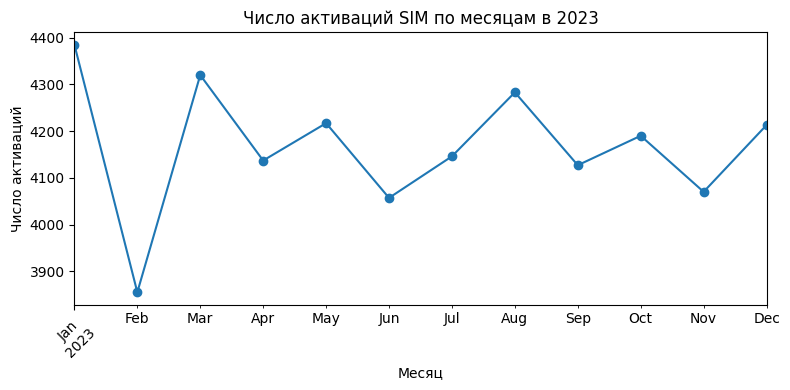

In [42]:

subs['sim_activation_date'] = pd.to_datetime(subs['sim_activation_date'])

activations_month = subs['sim_activation_date'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(8,4))
activations_month.plot(kind='line', marker='o')
plt.title('–ß–∏—Å–ª–æ –∞–∫—Ç–∏–≤–∞—Ü–∏–π SIM –ø–æ –º–µ—Å—è—Ü–∞–º –≤ 2023')
plt.xlabel('–ú–µ—Å—è—Ü')
plt.ylabel('–ß–∏—Å–ª–æ –∞–∫—Ç–∏–≤–∞—Ü–∏–π')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


–ê–Ω–∞–ª–∏–∑ –¥–∏–Ω–∞–º–∏–∫–∏ –∞–∫—Ç–∏–≤–∞—Ü–∏–π SIM –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –≤—ã—Ä–∞–∂–µ–Ω–Ω—É—é —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å. –ü–∏–∫ –≤ —è–Ω–≤–∞—Ä–µ —Å–≤—è–∑–∞–Ω —Å –Ω–æ–≤–æ–≥–æ–¥–Ω–∏–º–∏ –ø–æ–¥–∞—Ä–∫–∞–º–∏, –∞ —Ç–∞–∫–∂–µ –∫–æ—Ä–ø–æ—Ä–∞—Ç–∏–≤–Ω—ã–º–∏ –∑–∞–∫—É–ø–∫–∞–º–∏. –í –º–∞—Ä—Ç–µ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è —Ä–æ—Å—Ç, –≤–µ—Ä–æ—è—Ç–Ω–æ, –∑–∞ —Å—á–µ—Ç –ø—Ä–∞–∑–¥–Ω–∏—á–Ω—ã–∑ –ø–æ–¥–∞—Ä–∫–æ–≤ –Ω–∞ 8 –º–∞—Ä—Ç–∞. –í –∞–≤–≥—É—Å—Ç–µ —Ñ–∏–∫—Å–∏—Ä—É–µ—Ç—Å—è –≤—Å–ø–ª–µ—Å–∫ —Å–≤—è–∑–∞–Ω–Ω—ã–π —Å –ø–æ–¥–≥–æ—Ç–æ–≤–∫–æ–π –∫ —É—á–µ–±–Ω–æ–º—É –≥–æ–¥—É. –í –¥–µ–∫–∞–±—Ä–µ —Ä–æ—Å—Ç –æ–±—ä—è—Å–Ω—è–µ—Ç—Å—è —Å–µ–∑–æ–Ω–Ω—ã–º–∏ –ø–æ–∫—É–ø–∞–∫–º–∏ –ø–µ—Ä–µ–¥ –ù–ì –∏ –∑–∞–∫—Ä—ã—Ç–∏–µ–º –∫–æ—Ä–ø–æ—Ä–∞—Ç–∏–≤–Ω—ã—Ö –ø–ª–∞–Ω–æ–≤ (–∏ –ø—Ä–µ–º–∏–π)

In [44]:
calls_agg = (
    calls
    .groupby('subs_id')
    .agg(
        call_count=('subs_id', 'count'),
        total_call_duration=('duration_sec', 'sum'),
        unique_callees=('subs_id', 'nunique')
    )
    .reset_index()
    .rename(columns={'subs_id': 'subs_id'})
)
loc_agg = (
    location
    .groupby('subs_id')
    .size()
    .reset_index(name='loc_count')
)
activity = (
    subs[['subs_id', 'churn_flag']]
    .merge(calls_agg, on='subs_id', how='left')
    .merge(loc_agg,  on='subs_id', how='left')
    .fillna(0)
)

activity.head(5)


subs_id  churn_flag  call_count  total_call_duration  unique_callees  \
0   100000           0         6.0                518.0             1.0   
1   100001           0        13.0               1727.0             1.0   
2   100002           0         8.0                942.0             1.0   
3   100003           0        21.0               2416.0             1.0   
4   100004           0        11.0               1345.0             1.0   

   loc_count  
0         13  
1         14  
2         14  
3         13  
4          4

<Figure size 600x400 with 0 Axes>

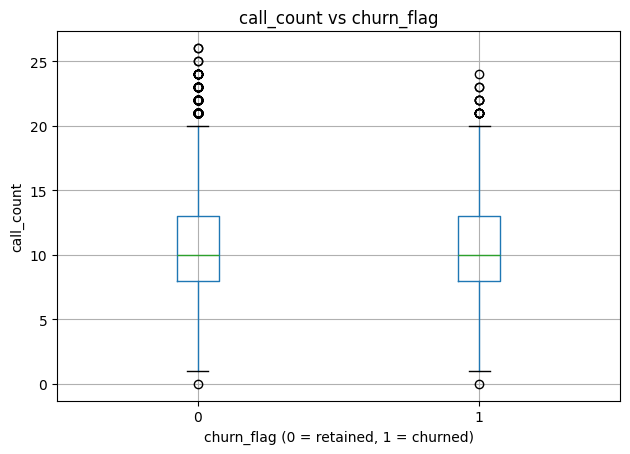

<Figure size 600x400 with 0 Axes>

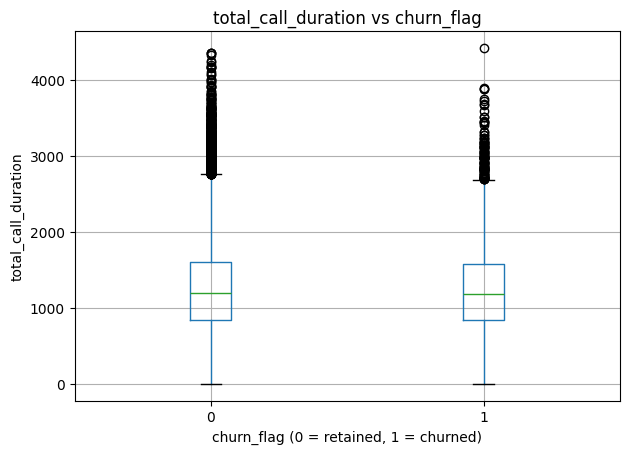

<Figure size 600x400 with 0 Axes>

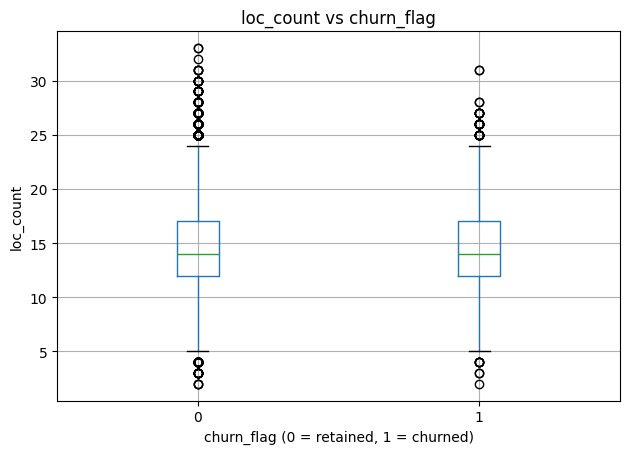

In [46]:
features = ['call_count', 'total_call_duration', 'loc_count']

for feat in features:
    plt.figure(figsize=(6,4))
    activity.boxplot(column=feat, by='churn_flag')
    plt.title(f'{feat} vs churn_flag')
    plt.suptitle('')
    plt.xlabel('churn_flag (0 = retained, 1 = churned)')
    plt.ylabel(feat)
    plt.tight_layout()
    plt.show()


1 Boxplot
–ê–Ω–∞–ª–∏–∑ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∑–≤–æ–Ω–∫–æ–≤ —É –∞–±–æ–Ω–µ–Ω—Ç–æ–≤, –ø–æ–∫–∏–Ω—É–≤—à–∏—Ö –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞ –∏ –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è –ø–æ–∫–∞–∑–∞–ª —Å—Ö–æ–∂–µ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏: –º–µ–¥–∏–∞–Ω–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ 10, –∞ –º–µ–∂–∫–≤–∞—Ä—Ç–∞–ª—å–Ω—ã–π —Ä–∞–∑–º–∞—Ö –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö 8-13 –∑–≤–æ–Ω–∫–æ–≤. –≠—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Ç–æ, —á—Ç–æ —Ç–æ–ª—å–∫–æ –ø–æ –∫–æ–ª–∏—á–µ—Å–≤—Ç–≤—É –∑–≤–æ–Ω–∫–æ–≤ —Å–ª–æ–∂–Ω–æ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞—Ç—å —É—Ö–æ–¥ –∞–±–æ–Ω–µ–Ω—Ç–∞. –û–¥–Ω–∞–∫–æ –∑–∞–º–µ—Ç–Ω—ã –≤—ã–±—Ä–æ—Å—ã - –∫–∞–∫ –≤ —Å—Ç–æ—Ä–æ–Ω—É –Ω–∏–∑–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ (–ø–æ—á—Ç–∏ –Ω—É–ª–µ–≤—ã–µ –∑–≤–æ–Ω–∫–∏), —Ç–∞–∫ –∏ –≤—ã—Å–æ–∫–æ–π (20+ –∑–≤–æ–Ω–∫–æ–≤), —á—Ç–æ –º–æ–∂–µ—Ç —Å–ª—É–∂–∏—Ç—å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–º–∏ –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä–∞–º–∏ –≤ –∫–æ–º–ø–ª–µ–∫—Å–Ω–æ–π –º–æ–¥–µ–ª–∏
2 Boxplot

---


–ù–∞ —ç—Ç–æ–º –ø–ª–æ—Ç–µ —Ç–∞–∫ –∂–µ –æ—á–µ–Ω—å —Å—Ö–æ–∂–∏. –ú–µ–¥–∏–∞–Ω–Ω–æ–π –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—â–∞—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∑–≤–æ–Ω–∫–æ–≤ 1200 —Å–µ–∫—É–Ω–¥,–º–µ–∂–∫–≤–∞—Ä—Ç–∞–ª—å–Ω—ã–π —Ä–∞–∑–º–∞—Ö –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö –æ—Ç 900 —Å–µ–∫—É–Ω–¥ –¥–æ 1700 —Å–µ–∫—É–Ω–¥. –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞—Ç—å –∑–¥–µ—Å—å –±—É–¥–µ—Ç —Å–ª–æ–∂–Ω–æ. –ü–∞—Ç—Ç–µ—Ä–Ω–æ–≤ –æ—Ç—Ç–æ–∫–≤–∞ –ø–æ—á—Ç–∏ –Ω–µ—Ç. –í–∏–¥–Ω–æ —á—Ç–æ –∞–Ω–æ–º–∞–ª—å–Ω–æ–µ –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –µ—Å—Ç—å —É –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è –∫–ª–∏–µ–Ω—Ç–æ–≤ –±–æ–ª—å—à–µ —á–µ–º —É —É—Ç–µ–∫—à–∏—Ö.

---


3 Boxplot
–ú–µ–¥–∏–∞–Ω–Ω–æ–π –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª–æ–∫–∞—Ü–∏–π –∞–±–æ–Ω–µ–Ω—Ç–æ–≤ 14. –ú–µ–∂–∫–≤–∞—Ä—Ç–∞–ª—å–Ω—ã–π —Ä–∞–∑–º–∞—Ö –æ—Ç 12 –¥–æ 17. –ê–Ω–æ–º–∞–ª–∏–π > 24 –±–æ–ª—å—à–µ —É –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è –∞–±–æ–Ω–µ–Ω—Ç–æ–≤ —á–µ–º —É —É—Ç–µ–∫—à–∏—Ö.

# –ì–∏–ø–æ—Ç–µ–∑—ã

–ì–∏–ø–æ—Ç–µ–∑–∞ 1. ¬´–î–æ–º–∞—à–Ω—è—è¬ª –ª–æ–∫–∞—Ü–∏—è —Å–æ–≤–ø–∞–¥–∞–µ—Ç
–°—É—Ç—å: —á–ª–µ–Ω—ã —Å–µ–º—å–∏ —á–∞—â–µ –≤—Å–µ–≥–æ –Ω–∞—Ö–æ–¥—è—Ç—Å—è –¥–æ–º–∞ –≤ –æ–¥–Ω–æ–π –∏ —Ç–æ–π –∂–µ —Ç–æ—á–∫–µ (lat/lon –∏–ª–∏ cell_id).
–ü—Ä–æ–≤–µ—Ä–∫–∞:

–î–ª—è –∫–∞–∂–¥–æ–≥–æ subs_id –≤—ã—á–∏—Å–ª–∏—Ç—å ¬´–¥–æ–º–∞—à–Ω—é—é¬ª —Ç–æ—á–∫—É –∫–∞–∫ –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—É—é –ø–∞—Ä—É (latitude, longitude) –∏–ª–∏ mode –æ—Ç cell_id.

–ü–æ—Å—Ç—Ä–æ–∏—Ç—å –≥—Ä—É–ø–ø—ã –ø–æ —ç—Ç–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É: –≤—Å–µ –∞–±–æ–Ω–µ–Ω—Ç—ã —Å –æ–¥–∏–Ω–∞–∫–æ–≤–æ–π ¬´–¥–æ–º–∞—à–Ω–µ–π¬ª —Ç–æ—á–∫–æ–π ‚Üí candidate family.

–û—Ü–µ–Ω–∏—Ç—å, –∫–∞–∫ —á–∞—Å—Ç–æ –∏–¥–µ–Ω—Ç–∏—á–Ω—ã–µ —Ç–æ—á–∫–∏ –ø–æ—è–≤–ª—è—é—Ç—Å—è —É —Ä–∞–∑–Ω—ã—Ö subs_id: —á–∏—Å–ª–æ –≥—Ä—É–ø–ø –∏ –∏—Ö —Ä–∞–∑–º–µ—Ä—ã.

–°—Ä–∞–≤–Ω–∏—Ç—å –ø–ª–æ—Ç–Ω–æ—Å—Ç—å –≤–Ω—É—Ç—Ä–µ–Ω–Ω–∏—Ö –∑–≤–æ–Ω–∫–æ–≤ –≤ —Ç–∞–∫–∏—Ö –≥—Ä—É–ø–ø–∞—Ö (–≥–∏–ø–æ—Ç–µ–∑–∞ 2) —Å —á–∏—Å—Ç—ã–º–∏ —Å–ª—É—á–∞–π–Ω—ã–º–∏ –Ω–∞–±–æ—Ä–∞–º–∏.

In [56]:
location['timestamp'] = pd.to_datetime(location['timestamp'])

home = (
    location
    .groupby(['subs_id', 'lat', 'lon'])
    .size()
    .rename('cnt')
    .reset_index()
)

home = (
    home
    .sort_values(['subs_id','cnt'], ascending=[True,False])
    .drop_duplicates('subs_id')
    .loc[:, ['subs_id', 'lat', 'lon']]
)

home['home_loc'] = home['lat'].round(3).astype(str) + '_' + home['lon'].round(3).astype(str)
home['family_group_loc'] = 'LOC_' + home['home_loc']

home[['subs_id','family_group_loc']].head()
home = home[['subs_id','family_group_loc']]
home.head()

subs_id   family_group_loc
0    100000  LOC_51.128_71.488
13   100001  LOC_51.131_71.479
27   100002  LOC_51.107_71.512
41   100003   LOC_51.14_71.454
54   100004  LOC_51.156_71.476

–ì–∏–ø–æ—Ç–µ–∑–∞ 2. ¬´–û–±—â–∏–µ —Ç–æ–ø-3 –∫–æ–Ω—Ç–∞–∫—Ç–∞¬ª
–°—É—Ç—å:
–ß–ª–µ–Ω—ã —Å–µ–º—å–∏ —á–∞—Å—Ç–æ –∑–≤–æ–Ω—è—Ç –æ–¥–Ω–∏–º –∏ —Ç–µ–º –∂–µ –∫–ª—é—á–µ–≤—ã–º –∫–æ–Ω—Ç–∞–∫—Ç–∞–º (–Ω–∞–ø—Ä–∏–º–µ—Ä, —Ä–æ–¥—Å—Ç–≤–µ–Ω–Ω–∏–∫–∞–º, –¥—Ä—É–≥–∏–º —á–ª–µ–Ω–∞–º —Å–µ–º—å–∏, –¥–æ–º–∞—à–Ω–µ–º—É —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–º—É –Ω–æ–º–µ—Ä—É).

–õ–æ–≥–∏–∫–∞:

–£ –∫–∞–∂–¥–æ–≥–æ –∞–±–æ–Ω–µ–Ω—Ç–∞ —Å—Ñ–æ—Ä–º–∏—Ä—É–µ—Ç—Å—è —Å–ø–∏—Å–æ–∫ –∏–∑ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—ã—Ö –Ω–æ–º–µ—Ä–æ–≤, –∫ –∫–æ—Ç–æ—Ä—ã–º –æ–Ω –∑–≤–æ–Ω–∏—Ç.

–ï—Å–ª–∏ —É –¥–≤—É—Ö –∞–±–æ–Ω–µ–Ω—Ç–æ–≤ —Å–æ–≤–ø–∞–¥–∞–µ—Ç –Ω–∞–±–æ—Ä —ç—Ç–∏—Ö ¬´—Ç–æ–ø-3¬ª –∫–æ–Ω—Ç–∞–∫—Ç–æ–≤, –æ–Ω–∏, —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, –æ–±—â–∞—é—Ç—Å—è —á–µ—Ä–µ–∑ –æ–¥–Ω–∏ –∏ —Ç–µ –∂–µ —Å–µ–º–µ–π–Ω—ã–µ ¬´—Ü–µ–Ω—Ç—Ä—ã¬ª —Å–≤—è–∑–∏.

–û–∂–∏–¥–∞–µ–º—ã–π —ç—Ñ—Ñ–µ–∫—Ç:

–°–≥—Ä—É–ø–ø–∏—Ä—É—é—Ç—Å—è –∞–±–æ–Ω–µ–Ω—Ç—ã —Å –∏–¥–µ–Ω—Ç–∏—á–Ω—ã–º –∫–æ—Ä—Ç–µ–∂–µ–º –∏–∑ —Ç—Ä—ë—Ö –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—ã—Ö peer-–Ω–æ–º–µ—Ä–æ–≤.

–¢–∞–∫–∏–µ –≥—Ä—É–ø–ø—ã, –∫–∞–∫ –ø—Ä–∞–≤–∏–ª–æ, –Ω–µ–≤–µ–ª–∏–∫–∏ –∏ –æ—Ç—Ä–∞–∂–∞—é—Ç —Ä–µ–∞–ª—å–Ω—ã–π —Å–æ—Ü–∏–∞–ª—å–Ω–æ-–±—ã—Ç–æ–≤–æ–π –∫—Ä—É–≥ (—Å–µ–º—å—é –∏–ª–∏ –±–ª–∏–∑–∫–∏—Ö —Ä–æ–¥—Å—Ç–≤–µ–Ω–Ω–∏–∫–æ–≤).

In [57]:
K = 3
top_contacts = (
  calls
  .groupby('subs_id')['b_number']
  .value_counts()
  .groupby(level=0)
  .head(K)
  .reset_index(name='cnt')
  .groupby('subs_id')['b_number']
  .apply(lambda x: tuple(sorted(x)))
  .reset_index(name='topK')
  .rename(columns={'subs_id':'subs_id'})
)
top_contacts['family_group_topK'] = top_contacts['topK'].astype(str)


–ì–∏–ø–æ—Ç–µ–∑–∞ 3. ¬´–í—ã—Ö–æ–¥–Ω–∞—è¬ª –ª–æ–∫–∞—Ü–∏—è —Å–æ–≤–ø–∞–¥–∞–µ—Ç
–°—É—Ç—å:
–°–µ–º—å—è –ø—Ä–æ–≤–æ–¥–∏—Ç –≤—ã—Ö–æ–¥–Ω—ã–µ –≤–º–µ—Å—Ç–µ, –∏ –∏—Ö –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç–∞—è –ª–æ–∫–∞—Ü–∏—è –≤ —Å—É–±–±–æ—Ç—É‚Äì–≤–æ—Å–∫—Ä–µ—Å–µ–Ω—å–µ —Å–æ–≤–ø–∞–¥–∞–µ—Ç —Å –¥–æ–º–∞—à–Ω–µ–π –∏–ª–∏ –¥–∞—á–Ω–æ–π —Ç–æ—á–∫–æ–π.

–õ–æ–≥–∏–∫–∞:

–í –±—É–¥–Ω–∏ –ª—é–¥–∏ –º–æ–≥—É—Ç —Ä–∞–∑—ä–µ–∑–∂–∞—Ç—å—Å—è –Ω–∞ —Ä–∞–±–æ—Ç—É/—É—á—ë–±—É, –Ω–æ –≤ –≤—ã—Ö–æ–¥–Ω—ã–µ –≤–æ–∑–≤—Ä–∞—â–∞—é—Ç—Å—è –≤ ¬´—Å–µ–º–µ–π–Ω—ã–π –æ—á–∞–≥¬ª.

–û—Ç–¥–µ–ª—å–Ω—ã–π —Ä–∞—Å—á—ë—Ç mode-–ª–æ–∫–∞—Ü–∏–∏ –ø–æ —Ç–µ–º –∑–∞–ø–∏—Å—è–º, —á—Ç–æ –ø–æ–ø–∞–¥–∞—é—Ç –Ω–∞ –≤—ã—Ö–æ–¥–Ω—ã–µ, –≤—ã—è–≤–∏—Ç –∏–º–µ–Ω–Ω–æ —Å–µ–º–µ–π–Ω—ã–µ ¬´–¥–æ–º–∞—à–Ω–∏–µ¬ª –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã.

–û–∂–∏–¥–∞–µ–º—ã–π —ç—Ñ—Ñ–µ–∫—Ç:

–í—ã–¥–µ–ª—è—é—Ç—Å—è —Å—Ç–∞–±–∏–ª—å–Ω—ã–µ –≥—Ä—É–ø–ø—ã –ø–æ —Ç–æ—á–∫–µ weekend-mode, —á–∞—Å—Ç–æ —Å–æ–≤–ø–∞–¥–∞—é—â–∏–µ —Å –≥–∏–ø–æ—Ç–µ–∑–æ–π 1, –Ω–æ –¥–∞—é—â–∏–µ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—É—é —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç—å (–∏—Å–∫–ª—é—á–∞—è —Ä–∞–±–æ—á–∏–µ –ª–æ–∫–∞—Ü–∏–∏).

–ü–æ–º–æ–≥–∞–µ—Ç –æ—Ç—Å–µ—è—Ç—å ‚Äú—Å–æ—Å–µ–¥–µ–π –ø–æ –æ—Ñ–∏—Å—É‚Äù –∏–ª–∏ ‚Äú—à–∫–æ–ª—å–Ω—ã—Ö –∫–æ–ª–ª–µ–≥‚Äù, —á—å–∏ –±—É–¥–Ω–∏–µ —Ç–æ—á–∫–∏ –º–æ–≥—É—Ç —Å–æ–≤–ø–∞–¥–∞—Ç—å, –Ω–æ –≤ –≤—ã—Ö–æ–¥–Ω—ã–µ –æ–Ω–∏ —Ä–∞–∑–±—Ä–µ–¥–∞—é—Ç—Å—è.

In [58]:
weekends = location[
  location['timestamp'].dt.weekday.isin([5,6])
]
weekend_home = (
  weekends
  .groupby(['subs_id','lat','lon'])
  .size()
  .reset_index(name='cnt')
  .sort_values(['subs_id','cnt'], ascending=[True,False])
  .drop_duplicates('subs_id')
  .assign(
    home_w = lambda df: df['lat'].round(5).astype(str)+'_'+df['lon'].round(5).astype(str),
    family_group_weekend = lambda df: 'WKND_'+df['home_w']
  )
  [['subs_id','family_group_weekend']]
)
weekend_home.head()

subs_id    family_group_weekend
0    100000   WKND_51.1315_71.44858
7    100001  WKND_51.13066_71.47926
12   100002  WKND_51.14173_71.46707
17   100003  WKND_51.14322_71.46929
21   100005  WKND_51.15217_71.43884

In [117]:
df_merged = pd.merge(home, weekend_home, on='subs_id', how='outer')
df = pd.merge(df_merged, top_contacts, on='subs_id', how='outer')

df.head()


subs_id   family_group_loc    family_group_weekend  \
0   100000  LOC_51.128_71.488   WKND_51.1315_71.44858   
1   100001  LOC_51.131_71.479  WKND_51.13066_71.47926   
2   100002  LOC_51.107_71.512  WKND_51.14173_71.46707   
3   100003   LOC_51.14_71.454  WKND_51.14322_71.46929   
4   100004  LOC_51.156_71.476                     NaN   

                       topK         family_group_topK  
0  (119560, 123246, 124520)  (119560, 123246, 124520)  
1  (104568, 112542, 146586)  (104568, 112542, 146586)  
2  (109078, 121098, 122350)  (109078, 121098, 122350)  
3  (100784, 116939, 129373)  (100784, 116939, 129373)  
4  (107180, 111301, 119192)  (107180, 111301, 119192)

# –ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è

In [119]:
import networkx as nx
pairs_loc = (
    df.merge(df, on='family_group_loc')
      .query('subs_id_x < subs_id_y')
      .assign(score=1)
      [['subs_id_x','subs_id_y','score']]
)

pairs_weekend = (
    df.merge(df, on='family_group_weekend')
      .query('subs_id_x < subs_id_y')
      .assign(score=1)
      [['subs_id_x','subs_id_y','score']]
)

pairs_topk = (
    df.merge(df, on='family_group_topK')
      .query('subs_id_x < subs_id_y')
      .assign(score=0.5)
      [['subs_id_x','subs_id_y','score']]
)

pairs_df = (
    pd.concat([pairs_loc, pairs_weekend, pairs_topk])
      .groupby(['subs_id_x','subs_id_y'])['score']
      .sum()
      .reset_index()
)

pairs_df = pairs_df.query("score >= 1.0")

print("–û—Å—Ç–∞–≤—à–∏–µ—Å—è –ø–∞—Ä—ã:", len(pairs_df))
print(pairs_df.head())

G = nx.Graph()
for _, row in pairs_df.iterrows():
    G.add_edge(row['subs_id_x'], row['subs_id_y'], weight=row['score'])

components = list(nx.connected_components(G))
G.add_nodes_from(df['subs_id'].unique())

family_groups = {}
for i, comp in enumerate(components, start=1):
    for node in comp:
        family_groups[node] = f'FAM_{i}'

family_groups_df = pd.DataFrame(list(family_groups.items()), columns=['subs_id','family_group'])

calls2 = calls.merge(family_groups_df, on='subs_id', how='left') \
              .rename(columns={'family_group':'group_u'})
calls2 = calls2.merge(family_groups_df.rename(columns={'subs_id':'b_number',
                                                       'family_group':'group_v'}),
                      on='b_number', how='left')
calls2['intra_call'] = (calls2['group_u'] == calls2['group_v'])

print("–î–æ–ª—è –≤–Ω—É—Ç—Ä–∏–∫–ª–∞—Å—Ç–µ—Ä–Ω—ã—Ö –∑–≤–æ–Ω–∫–æ–≤:", calls2['intra_call'].mean())


–û—Å—Ç–∞–≤—à–∏–µ—Å—è –ø–∞—Ä—ã: 419308
   subs_id_x  subs_id_y  score
0     100000     101126    1.0
1     100000     101856    1.0
2     100000     105968    1.0
3     100000     110620    1.0
4     100000     111813    1.0
–î–æ–ª—è –≤–Ω—É—Ç—Ä–∏–∫–ª–∞—Å—Ç–µ—Ä–Ω—ã—Ö –∑–≤–æ–Ω–∫–æ–≤: 0.015546666666666667


–ö–æ–¥ –æ–±—ä–µ–¥–∏–Ω—è–µ—Ç –∞–±–æ–Ω–µ–Ω—Ç–æ–≤ –≤ ¬´—Å–µ–º—å–∏¬ª –Ω–∞ –æ—Å–Ω–æ–≤–µ —Ç—Ä—ë—Ö –≥–∏–ø–æ—Ç–µ–∑: —Å–æ–≤–ø–∞–¥–µ–Ω–∏—è –¥–æ–º–∞—à–Ω–µ–π –∏ –≤—ã—Ö–æ–¥–Ω–æ–π –ª–æ–∫–∞—Ü–∏–∏, –∞ —Ç–∞–∫–∂–µ –æ–±—â–∏—Ö —Ç–æ–ø-3 –∫–æ–Ω—Ç–∞–∫—Ç–æ–≤, –ø—Ä–∏—Å–≤–∞–∏–≤–∞—è –∫–∞–∂–¥–æ–π –ø–∞—Ä–µ –±–∞–ª–ª (score). –ù–∞ –æ—Å–Ω–æ–≤–µ —ç—Ç–∏—Ö —Å–æ–≤–ø–∞–¥–µ–Ω–∏–π —Å—Ç—Ä–æ–∏—Ç—Å—è –≥—Ä–∞—Ñ, –≥–¥–µ –≤–µ—Ä—à–∏–Ω—ã ‚Äî –∞–±–æ–Ω–µ–Ω—Ç—ã, –∞ —Ä—ë–±—Ä–∞ ‚Äî —Å–≤—è–∑–∏ —Å –≤–µ—Å–∞–º–∏. –°–≤—è–∑–Ω—ã–µ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã –≥—Ä–∞—Ñ–∞ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É—é—Ç—Å—è –∫–∞–∫ —Å–µ–º–µ–π–Ω—ã–µ –≥—Ä—É–ø–ø—ã –∏ —Å–æ—Ö—Ä–∞–Ω—è—é—Ç—Å—è –≤ —Ç–∞–±–ª–∏—Ü—É. –î–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ —Å—á–∏—Ç–∞–µ—Ç—Å—è –¥–æ–ª—è –∑–≤–æ–Ω–∫–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–æ–∏—Å—Ö–æ–¥—è—Ç –≤–Ω—É—Ç—Ä–∏ —Ç–∞–∫–∏—Ö –≥—Ä—É–ø–ø, —á—Ç–æ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, –Ω–∞—Å–∫–æ–ª—å–∫–æ –≤—ã–¥–µ–ª–µ–Ω–Ω—ã–µ –∫–ª–∞—Å—Ç–µ—Ä—ã –æ—Ç—Ä–∞–∂–∞—é—Ç —Ä–µ–∞–ª—å–Ω—ã–µ —Å–≤—è–∑–∏.

In [105]:
len(family_groups_df['family_group'].unique())

5958

In [106]:
sizes = family_groups_df.groupby('family_group').size()
print(sizes.value_counts().sort_index())


2       1306
3        910
4        673
5        498
6        388
7        345
8        288
9        226
10       183
11       128
12       111
13        94
14       106
15        93
16        66
17        71
18        71
19        52
20        63
21        48
22        46
23        37
24        38
25        23
26        17
27        22
28        13
29        11
30         8
31         5
32         3
33         3
34         2
35         2
37         1
38         1
40         2
41         1
45         1
48         1
6202       1
Name: count, dtype: int64


In [107]:
print("–°—Ä–µ–¥–Ω–∏–π —Ä–∞–∑–º–µ—Ä —Å–µ–º—å–∏:", sizes.mean())
print("–ú–µ–¥–∏–∞–Ω–Ω—ã–π —Ä–∞–∑–º–µ—Ä —Å–µ–º—å–∏:", sizes.median())


–°—Ä–µ–¥–Ω–∏–π —Ä–∞–∑–º–µ—Ä —Å–µ–º—å–∏: 7.949144008056395
–ú–µ–¥–∏–∞–Ω–Ω—ã–π —Ä–∞–∑–º–µ—Ä —Å–µ–º—å–∏: 5.0


In [109]:
print("–ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π —Ä–∞–∑–º–µ—Ä —Å–µ–º—å–∏:", max(family_sizes))


–ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π —Ä–∞–∑–º–µ—Ä —Å–µ–º—å–∏: 6202


# –ö—Ä–∞—Ç–∫–∏–π –∏—Ç–æ–≥ –ø–æ –¥–∞–Ω–Ω—ã–º:

–í—Å–µ–≥–æ —Å–µ–º–µ–π (–∫–ª–∞—Å—Ç–µ—Ä–æ–≤): len(family_groups_df['family_group'].unique())

–°—Ä–µ–¥–Ω–∏–π —Ä–∞–∑–º–µ—Ä —Å–µ–º—å–∏: ~7.95

–ú–µ–¥–∏–∞–Ω–Ω—ã–π —Ä–∞–∑–º–µ—Ä —Å–µ–º—å–∏: 5 (–ø–æ–ª–æ–≤–∏–Ω–∞ —Å–µ–º–µ–π —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ 5 –∞–±–æ–Ω–µ–Ω—Ç–æ–≤ –∏–ª–∏ –º–µ–Ω—å—à–µ).

üìä –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–æ–≤:

–ù–∞–∏–±–æ–ª–µ–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω—ã –º–∞–ª—ã–µ —Å–µ–º—å–∏ (2‚Äì5 —á–ª–µ–Ω–æ–≤).

2 —á–µ–ª–æ–≤–µ–∫–∞ ‚Üí 1306 —Å–µ–º–µ–π

3 —á–µ–ª–æ–≤–µ–∫–∞ ‚Üí 910 —Å–µ–º–µ–π

4 —á–µ–ª–æ–≤–µ–∫–∞ ‚Üí 673 —Å–µ–º—å–∏

5 —á–µ–ª–æ–≤–µ–∫ ‚Üí 498 —Å–µ–º–µ–π

–î–∞–ª–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ—Å—Ç–µ–ø–µ–Ω–Ω–æ —É–º–µ–Ω—å—à–∞–µ—Ç—Å—è, –Ω–æ —Å–µ–º—å–∏ –¥–æ ~20 —á–µ–ª–æ–≤–µ–∫ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Ä–µ–≥—É–ª—è—Ä–Ω–æ.

–ï—Å—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –∞–Ω–æ–º–∞–ª—å–Ω–æ –∫—Ä—É–ø–Ω—ã—Ö –≥—Ä—É–ø–ø (–Ω–∞–ø—Ä–∏–º–µ—Ä, 48 –∏ –æ—Å–æ–±–µ–Ω–Ω–æ 6202 —á–ª–µ–Ω–æ–≤). –≠—Ç–æ, —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Ç–æ–≥–æ, —á—Ç–æ –≥—Ä–∞—Ñ –æ–±—ä–µ–¥–∏–Ω–∏–ª –º–Ω–æ–∂–µ—Å—Ç–≤–æ –æ–¥–∏–Ω–æ—á–µ–∫ –∏–ª–∏ ¬´—à—É–º–æ–≤—ã–µ —Å–≤—è–∑–∏¬ª (–Ω–∞–ø—Ä–∏–º–µ—Ä, –æ–±—â–∏–π –æ—Ñ–∏—Å –∏–ª–∏ call-center).

üìå –í—ã–≤–æ–¥:
–ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –≤—ã–¥–µ–ª–µ–Ω–Ω—ã—Ö –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç –æ–∂–∏–¥–∞–Ω–∏—è–º (—Å–µ–º—å–∏ –∏–∑ 2‚Äì6 —á–µ–ª–æ–≤–µ–∫). –û–¥–Ω–∞–∫–æ –Ω–∞–ª–∏—á–∏–µ –∞–Ω–æ–º–∞–ª—å–Ω–æ –±–æ–ª—å—à–∏—Ö ¬´—Å–µ–º–µ–π¬ª —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Ç–æ, —á—Ç–æ –∞–ª–≥–æ—Ä–∏—Ç–º –∏–Ω–æ–≥–¥–∞ –æ–±—ä–µ–¥–∏–Ω—è–µ—Ç –Ω–µ—Å–≤—è–∑–∞–Ω–Ω—ã—Ö –∞–±–æ–Ω–µ–Ω—Ç–æ–≤ –≤ –æ–¥–∏–Ω –∫–ª–∞—Å—Ç–µ—Ä. –î–ª—è –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–æ–≥–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è —Å—Ç–æ–∏—Ç –æ–≥—Ä–∞–Ω–∏—á–∏–≤–∞—Ç—å –∞–Ω–∞–ª–∏–∑ —Ç–æ–ª—å–∫–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º–∏ –¥–æ 10‚Äì15 —á–ª–µ–Ω–æ–≤ –∏ –æ—Ç–¥–µ–ª—å–Ω–æ —É—á–∏—Ç—ã–≤–∞—Ç—å –∫—Ä—É–ø–Ω—ã–µ –∫–∞–∫ —à—É–º.
–†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏:
–ú–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥—Ä—É–≥–∏–µ –≤–µ—Å–∞ –¥–ª—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –ò —Ç–∞–∫ –∂–µ –¥–æ–±–∞–≤–∏—Ç—å –ì–∏–ø–æ—Ç–µ–∑—ã —á—Ç–æ "–ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ —Å–µ–º–µ–π–Ω—ã–∑ –∑–≤–æ–Ω–∫–æ–≤ —Å–ª—É—á–∞–µ—Ç—Å—è –º–µ–∂–¥—É 17:00 –∏ 19:00", —Ç–∞–∫ –∫–∞–∫ —Ç–æ–≥–¥–∞ –ª—é–¥–∏ –æ—Å–≤–æ–±–æ–∂–¥–∞—é—Ç—Å—è –æ—Ç —Ä–∞–±–æ—Ç—ã –∏ –∑–≤–æ–Ω—è—Ç —Ä–æ–¥–Ω—ã–º. –ï—â–µ –µ—Å—Ç—å –≥–∏–ø–æ—Ç–µ–∑–∞ —á—Ç–æ "–ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∑–≤–æ–Ω–∫–æ–≤ –¥–ª–∏—Ç—Å—è –æ—Ç 25 —Å–µ–∫ –¥–æ 75 —Å–µ–∫", —á–∏—Ç–∞–ª —Ç–∞–∫—É—é –≥–∏–ø–æ—Ç–µ–∑—É –≤ –æ–¥–Ω–æ–π —Å—Ç–∞—Ç—å–µ.